In [1]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *
from fastai.vision import *

In [2]:
fastai.__version__

'1.0.58.dev0'

In [3]:
lesson_dir_path = Path('lesson6-pets-more')
data_dir_path = untar_data(URLs.PETS, dest=lesson_dir_path)

In [4]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4, p_affine=1., p_lighting=1.)

In [5]:
src = (ImageList.from_folder(path=data_dir_path/'images')
                .split_by_rand_pct(0.2, seed=1)
                .label_from_re(r'/([^/]+)_\d+.jpg$'))

#### 224

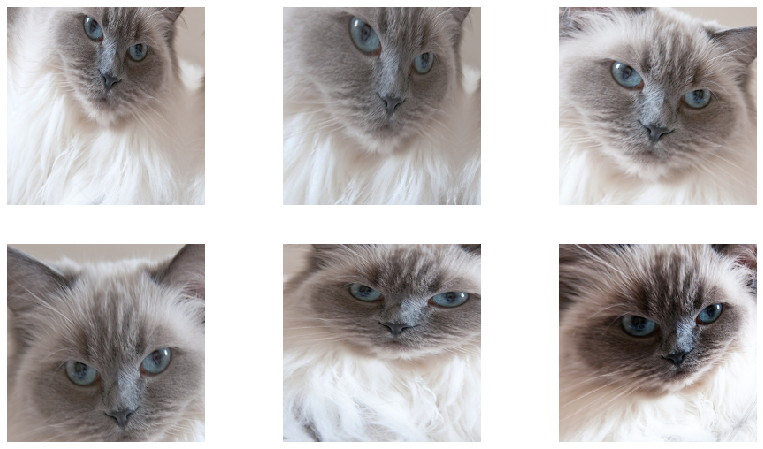

In [6]:
data = (src.transform(tfms, size=224)
           .databunch(path=data_dir_path)
           .normalize(imagenet_stats))
learn = cnn_learner(data, models.resnet34, metrics=accuracy, bn_final=True)
plot_multi(lambda i,j,ax : data.train_ds[1][0].show(ax), 2, 3, figsize=(14,8))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


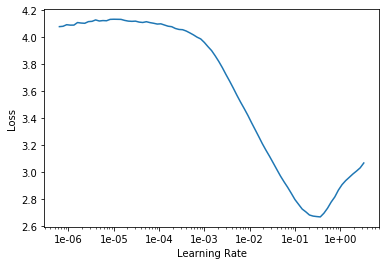

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
lr = 1e-2
learn.fit_one_cycle(3, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,accuracy,time
0,1.651022,0.350739,0.917456,00:19
1,0.966177,0.263510,0.921516,00:19
2,0.722589,0.230779,0.926928,00:19


In [9]:
learn.save('224-stage1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


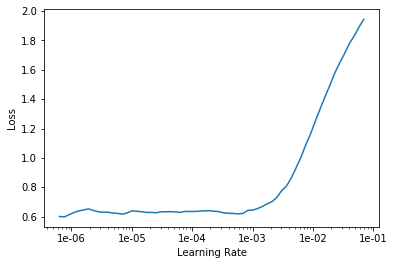

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(2, slice(1e-6, 1e-3), pct_start=0.8)

epoch,train_loss,valid_loss,accuracy,time
0,0.591143,0.236007,0.933694,00:21
1,0.567871,0.218322,0.945196,00:22


In [12]:
learn.save('224-stage2')

#### 352

In [13]:
data = (src.transform(tfms, size=352)
           .databunch(path=data_dir_path)
           .normalize(imagenet_stats))
learn = cnn_learner(data, models.resnet34, metrics=accuracy, bn_final=True)
learn.load('224-stage2');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


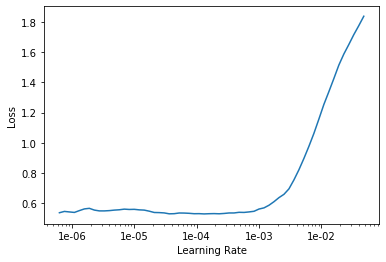

In [14]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.512304,0.207286,0.952639,00:39
1,0.475700,0.204867,0.955345,00:38


In [16]:
learn.save('352')